In [47]:
import requests
import pytz
from datetime import datetime

tz = pytz.timezone("Europe/Moscow")

bus_id = "bus_1"
door_id = "door_1"
start = int(datetime(2022, 9, 1, 0, 0, 0, tzinfo=tz).timestamp())
finish = int(datetime(2022, 10, 6, 0, 0, 0, tzinfo=tz).timestamp())

p = {
    "bus_id": bus_id,
    "door_id": door_id,
    "start": str(start),
    "finish": str(finish),
}
r = requests.get("http://194.113.237.29/db/get_log_data", params=p)
data = r.json()["data"]["result"]

# num_in = 0
# num_out = 0

# for entry in data:
#     i = entry["in"]
#     o = entry["out"]

#     num_in += i
#     num_out += o

#     print(
#         datetime.fromtimestamp(
#             float(entry["timestamp"]) * 1e-3, tz
#         ).isoformat(),
#         ": ",
#         entry,
#     )

# print("=" * 30)
# print(f"{len(data)} entries")
# print(f"In: {num_in}, Out: {num_out}")

In [41]:
get_datatime = lambda entry: datetime.fromtimestamp(float(entry["timestamp"]) * 1e-3, tz)
timestamps = list(map(get_datatime, data))
in_s = [entry['in'] for entry in data]
out_s = [entry['out'] for entry in data]

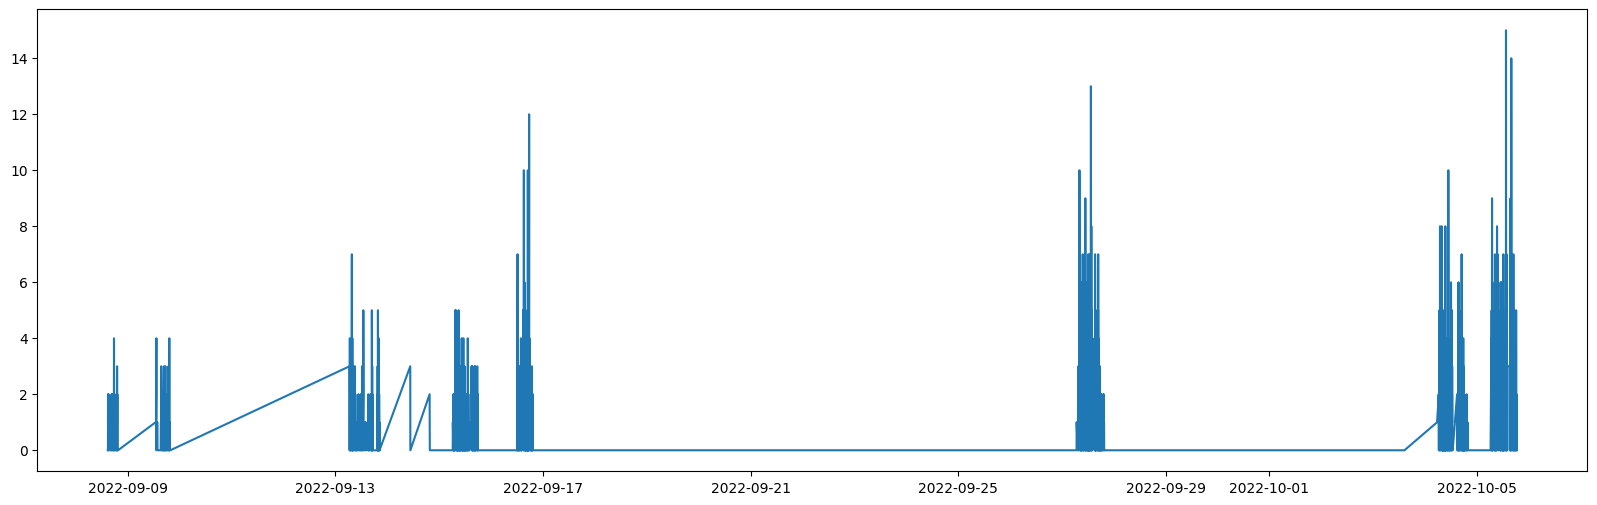

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(timestamps, in_s)
plt.show()

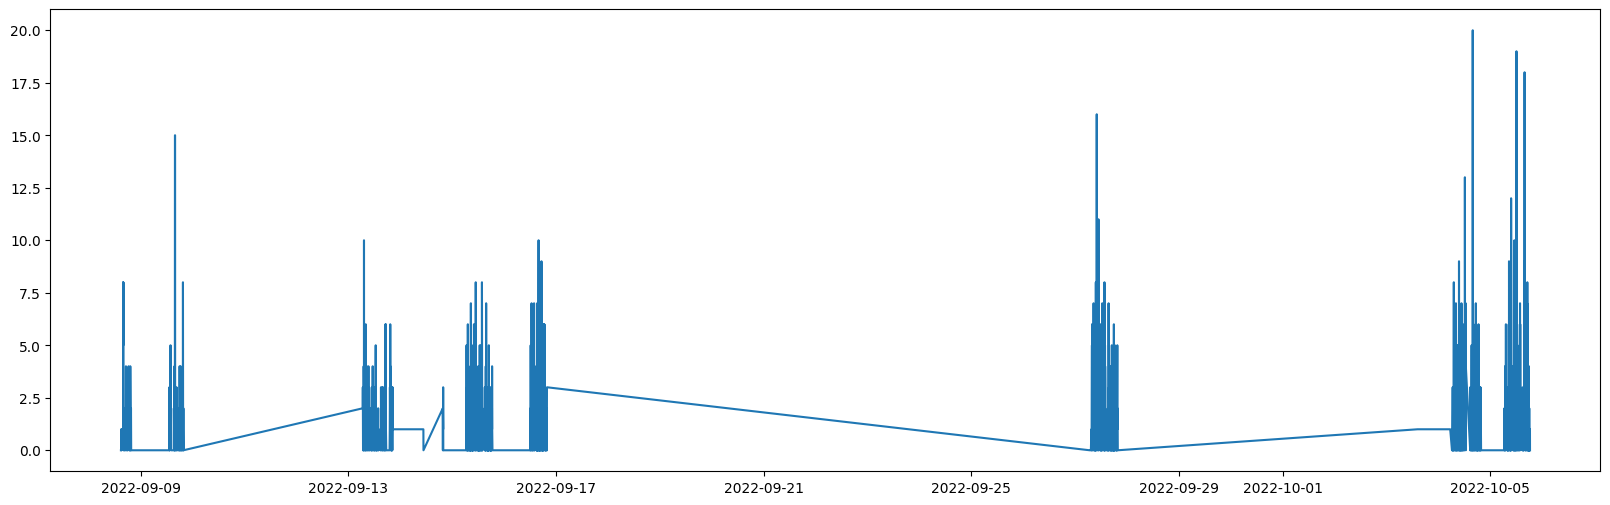

In [46]:
plt.figure(figsize=(20, 6))
plt.plot(timestamps, out_s)
plt.show()